In [2]:
import numpy as np
from numpy.random import RandomState
import copy
import os
import matplotlib.pyplot as plt
# import multiprocessing
import matplotlib.ticker as mticker
from scipy import stats
import math



#Make this notebook wider
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore') 


In [17]:
'''
The plots are presented in slightly different scales, so font sizes may differ between some of the plots. 
'''

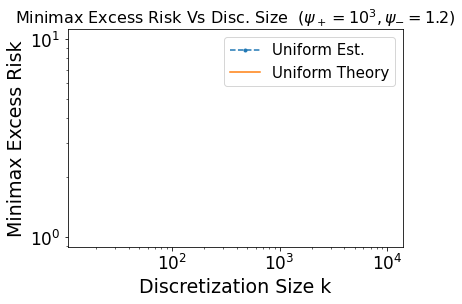

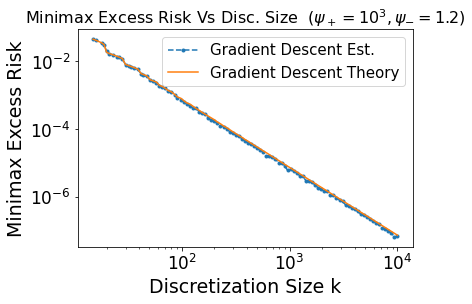

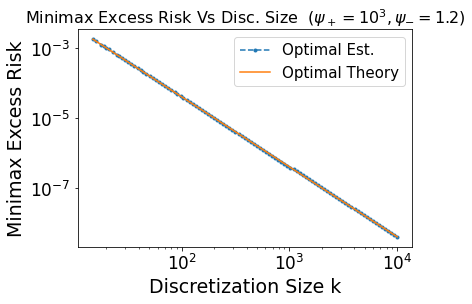

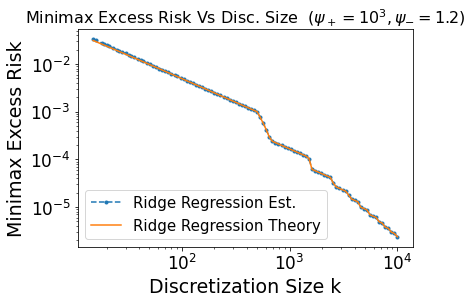

In [76]:
'''
Orthogonal Design Plots
'''


'''
Formatting 
'''
AxisTickLavelSize = 17
AxisLabelFontSize = 19
TitleFontSize = 16
LegendFontsize = 15




Disc = int((10**(5))) #Used to estimate the minimax rate by discretising the interval [alpha_min,alpha_max]
k_test_no = 100 #Number of values for k to try 
k_disc_test = (10**(np.linspace(1.2,4,k_test_no))).astype("int") #Values of k to try
alpha_minus = 1.2
alpha_plus = 1000



MinimaxError_Estimated = np.loadtxt("OrthogonalDesign/MinimaxError_Estimated.csv",delimiter=",")
MinimaxError_Theory = np.loadtxt("OrthogonalDesign/MinimaxError_Theory.csv",delimiter=",")

Labels = ["Uniform","Gradient Descent","Optimal","Ridge Regression"]
for i,label_iter in enumerate(Labels):
    plt.plot(k_disc_test,MinimaxError_Estimated[i],label=label_iter + " Est.",marker="o",ls="--",markersize=3)
    plt.plot(k_disc_test,MinimaxError_Theory[i],label=label_iter + " Theory")
    plt.legend()
    plt.xlabel("Discretization Size k",fontsize = AxisLabelFontSize)
    plt.ylabel("Minimax Excess Risk",fontsize = AxisLabelFontSize)
    plt.title("Minimax Excess Risk Vs Disc. Size  (" + r"$\psi_+ = 10^{3}$"   + r"$, \psi_{-} = $" + str(alpha_minus) + ")",fontsize=TitleFontSize)
    
    plt.xscale("log")
    plt.yscale("log")
    
    #Otherfontsizes
    plt.rc('xtick',labelsize=AxisTickLavelSize)
    plt.rc('ytick',labelsize=AxisTickLavelSize)
    plt.rc('legend',fontsize=LegendFontsize)
    
    plt.savefig("FinalPlots/MinimaxRisk_" + label_iter + ".pdf",dpi=128,bbox_inches="tight",pad_inches = 0)
    plt.show()









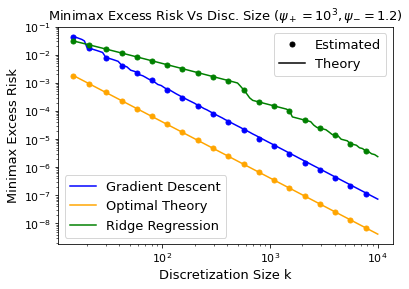

In [5]:
AxisTickLavelSize = 11
AxisLabelFontSize = 13
TitleFontSize = 13
LegendFontsize = 13 

MinimaxError_Estimated = np.loadtxt("OrthogonalDesign/MinimaxError_Estimated.csv",delimiter=",")
MinimaxError_Theory = np.loadtxt("OrthogonalDesign/MinimaxError_Theory.csv",delimiter=",")


k_test_no = 100 #Number of values for k to try 
k_disc_test = (10**(np.linspace(1.2,4,k_test_no))).astype("int") #Values of k to try
alpha_minus = 1.2
alpha_plus = 1000


MarkerNo = 20

plt.plot(k_disc_test,MinimaxError_Theory[1],label="Gradient Descent",color="blue")

plt.plot(k_disc_test[np.arange(0,len(MinimaxError_Estimated[1]),int(len(MinimaxError_Estimated[1])/MarkerNo))],MinimaxError_Estimated[1][np.arange(0,len(MinimaxError_Estimated[1]),int(len(MinimaxError_Estimated[1])/MarkerNo))],marker="o",ls="",markersize=5,color="blue")
    
plt.plot(k_disc_test,MinimaxError_Theory[2],label="Optimal Theory",color="orange")
plt.plot(k_disc_test[np.arange(0,len(MinimaxError_Estimated[1]),int(len(MinimaxError_Estimated[1])/MarkerNo))],MinimaxError_Estimated[2][np.arange(0,len(MinimaxError_Estimated[1]),int(len(MinimaxError_Estimated[1])/MarkerNo))],marker="o",ls="",markersize=5,color="orange")


plt.plot(k_disc_test,MinimaxError_Theory[3],label="Ridge Regression",color="green")
plt.plot(k_disc_test[np.arange(0,len(MinimaxError_Estimated[1]),int(len(MinimaxError_Estimated[1])/MarkerNo))],MinimaxError_Theory[3][np.arange(0,len(MinimaxError_Estimated[1]),int(len(MinimaxError_Estimated[1])/MarkerNo))],marker="o",ls="",markersize=5,color="green")

first_legend = plt.legend()

# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(first_legend)

# Create another legend for the second line.
# plt.legend(handles=[line2], loc=4)


h = [plt.plot([],[], color="Black", marker="o", ms=5, ls="",label="Estimated")[0],plt.plot([],[], color="Black", ls="-",label="Theory")[0]]
plt.legend(handles=h,loc=1)
# plt.legend()
# plt.axvline(7.5*(1+1./alpha_minus))

plt.xlabel("Discretization Size k",fontsize = AxisLabelFontSize)
plt.ylabel("Minimax Excess Risk",fontsize = AxisLabelFontSize)
plt.title("Minimax Excess Risk Vs Disc. Size (" + r"$\psi_+ = 10^{3}$"   + r"$, \psi_{-} = $" + str(alpha_minus) + ")",fontsize=TitleFontSize)

plt.xscale("log")
plt.yscale("log")

plt.rc('xtick',labelsize=AxisTickLavelSize)
plt.rc('ytick',labelsize=AxisTickLavelSize)
plt.rc('legend',fontsize=LegendFontsize)
    
plt.savefig("FinalPlots/MinimaxRisk_compared.pdf",dpi=128,bbox_inches="tight",pad_inches = 0)
plt.show()


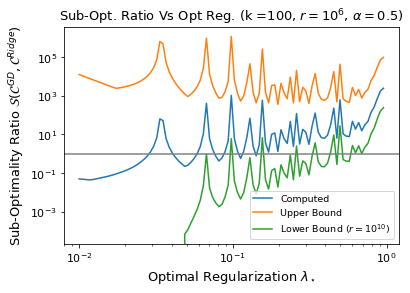

In [72]:
'''
Evaluate Upper and Lower Bounds Plots
'''

AxisTickLavelSize = 11
AxisLabelFontSize = 13
TitleFontSize = 13
LegendFontsize = 20


k=100

OptReg_list = np.loadtxt("Evaluate_UpperLower_Bounds/OptReg_list.csv",delimiter=",")
UpperBound = np.loadtxt("Evaluate_UpperLower_Bounds/UpperBound.csv",delimiter=",")
LowerBound = np.loadtxt("Evaluate_UpperLower_Bounds/LowerBound.csv",delimiter=",")
alpha = np.loadtxt("Evaluate_UpperLower_Bounds/alpha_test.csv",delimiter=",")
Ratios_store = np.loadtxt("Evaluate_UpperLower_Bounds/Ratios_store.csv",delimiter=",")

plt.plot(OptReg_list,Ratios_store,label=r"Computed")
plt.plot(OptReg_list,UpperBound,label=r"Upper Bound")
plt.plot(OptReg_list,LowerBound,label=r"Lower Bound" + r" $(r= 10^{10})$")
# plt.axvline(1./k,color="grey",label="1/k",ls="--")
plt.axhline(1,color="grey")
plt.legend(prop={'size': 9.5})
# plt.legend()
plt.rc('legend',fontsize=LegendFontsize)

plt.xscale("log")
plt.yscale("log")


plt.title("Sub-Opt. Ratio Vs Opt Reg. (k =" + str(k) + r", $r = 10^6$" + ", " + r"$\alpha = $"  + str(alpha) + ")",fontsize=TitleFontSize)
plt.xlabel("Optimal Regularization " + r"$\lambda_\star$",fontsize = AxisLabelFontSize)
plt.ylabel("Sub-Optimality Ratio " + r"$\mathcal{S}(\mathcal{C}^{GD},\mathcal{C}^{Ridge})$",fontsize = AxisLabelFontSize)

plt.rc('xtick',labelsize=AxisTickLavelSize)
plt.rc('ytick',labelsize=AxisTickLavelSize)
plt.rc('legend',fontsize=LegendFontsize)



plt.savefig("FinalPlots/Upper_Lowerbound_Computed.pdf",dpi=128,bbox_inches="tight",pad_inches = 0)

plt.show()




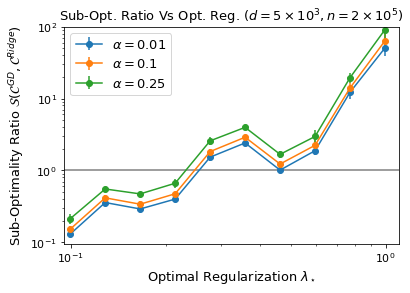

In [4]:
'''
Random Design Plots
'''

AxisTickLavelSize = 11
AxisLabelFontSize = 13
TitleFontSize = 13
LegendFontsize = 13


Foldernames = np.array(["new_alpha_001/","new_alpha_01/","new_alpha_025/"])
RatioEstimates_list = []
for TempDir in Foldernames:
    RatioEstimates_1 = np.loadtxt("RandomDesign/" + TempDir + "RatioEstimates1.csv",delimiter=",")
    RatioEstimates_2 = np.loadtxt("RandomDesign/" + TempDir + "RatioEstimates2.csv",delimiter=",")
    RatioEstimates_list.append(np.concatenate([RatioEstimates_1,RatioEstimates_2],1))
OptRidgeSequence = np.loadtxt("RandomDesign/new_alpha_001/OptRidgeSequence1.csv",delimiter=",")

Alpha_list = [0.01,0.1,0.25]

Dimension = 5000
SampleSize = 200000
for k,alpha in enumerate(Alpha_list):
    plt.errorbar(OptRidgeSequence,y=RatioEstimates_list[k].mean(axis=1),yerr=2*RatioEstimates_list[k].std(axis=1),marker="o",label=r"$\alpha = $" + str(alpha))
plt.legend()
plt.axhline(1,color="grey")
plt.ylim([0.095,100])
plt.xlim([0.095,1.1])
plt.xscale("log")
plt.yscale("log")
plt.title("Sub-Opt. Ratio Vs Opt. Reg. (" + r"$d = 5 \times 10^{3}, n = 2 \times 10^5 )$",fontsize=TitleFontSize)
plt.ylabel("Sub-Optimality Ratio " + r"$\mathcal{S}(\mathcal{C}^{GD},\mathcal{C}^{Ridge})$",fontsize=AxisLabelFontSize)
plt.xlabel("Optimal Regularization " + r"$\lambda_\star$" ,fontsize=AxisLabelFontSize)

plt.rc('xtick',labelsize=AxisTickLavelSize)
plt.rc('ytick',labelsize=AxisTickLavelSize)
plt.rc('legend',fontsize=LegendFontsize)


plt.savefig("FinalPlots/RatioVsOptReg1_allalpha.pdf",dpi=128,bbox_inches="tight",pad_inches = 0)
plt.show()



